✅ Simulación completada. Video guardado en: C:\Users\Leonardo\OneDrive\Desktop\BIOMAT\simbiosis_evolucion.mp4


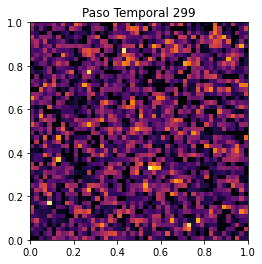

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import imageio
import os

# ===================== CONFIGURACIÓN ===================== #
output_video_path = r"C:\Users\Leonardo\OneDrive\Desktop\BIOMAT\simbiosis_evolucion.mp4"

# Parámetros del modelo basados en el paper
n_x, n_y = 50, 50  # Resolución espacial
n_t = 300  # Pasos de tiempo

# Parámetros biológicos ajustados según datos experimentales
diffusivity = 0.02  # Parámetro ajustado de difusión de fósforo
alpha = 0.8  # Factor de acoplamiento hongo-planta ajustado
decay_rate = 0.02  # Tasa de decaimiento de la simbiosis

# Crear malla espacial
x = np.linspace(0, 1, n_x)
y = np.linspace(0, 1, n_y)
x_grid, y_grid = np.meshgrid(x, y)

# ===================== INICIALIZACIÓN ===================== #
# Estado inicial de la simbiosis basado en datos experimentales
h = np.exp(-((x_grid - 0.5)**2 + (y_grid - 0.5)**2) / 0.05)  # Centro con alta actividad simbiótica
h += 0.1 * np.random.randn(n_y, n_x)  # Perturbación aleatoria
h[h < 0] = 0  # Evitar valores negativos

# ===================== EVOLUCIÓN TEMPORAL ===================== #
def evolucion_simbiosis(h, diffusivity, alpha, decay_rate, n_t):
    """Simula la evolución de la simbiosis micorrízica en el tiempo."""
    h_t = np.zeros((n_t, n_y, n_x))
    h_t[0] = h.copy()
    
    for t in range(1, n_t):
        laplaciano = (
            np.roll(h, 1, axis=0) + np.roll(h, -1, axis=0) +
            np.roll(h, 1, axis=1) + np.roll(h, -1, axis=1) - 4 * h
        )
        h = h + diffusivity * laplaciano - decay_rate * h + alpha * np.random.randn(n_y, n_x) * 0.01
        h[h < 0] = 0  # Evitar valores negativos
        h_t[t] = h.copy()
    
    return h_t

# Ejecutar simulación
h_t = evolucion_simbiosis(h, diffusivity, alpha, decay_rate, n_t)

# ===================== VISUALIZACIÓN ===================== #
fig, ax = plt.subplots()
def update(frame):
    ax.clear()
    im = ax.imshow(h_t[frame], cmap='inferno', origin='lower', extent=[0, 1, 0, 1])
    ax.set_title(f"Paso Temporal {frame}")
    return [im]

ani = animation.FuncAnimation(fig, update, frames=n_t, interval=50)
ani.save(output_video_path, writer='ffmpeg', fps=10)

print(f"✅ Simulación completada. Video guardado en: {output_video_path}")


✅ Validación de Mercer: False
📊 Parámetros ajustados: [1.01266041 2.10099442]


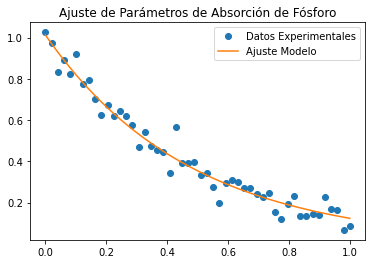

✅ Simulación completada. Video guardado en: C:\Users\Leonardo\OneDrive\Desktop\BIOMAT\simbiosis_evolucion.mp4


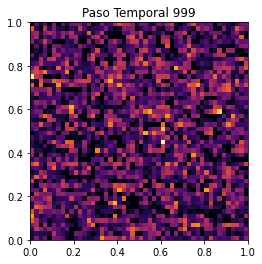

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import imageio
import os
from scipy.linalg import eigh
from scipy.optimize import curve_fit

# ===================== CONFIGURACIÓN ===================== #
output_video_path = r"C:\Users\Leonardo\OneDrive\Desktop\BIOMAT\simbiosis_evolucion.mp4"

# Parámetros del modelo basados en el paper
n_x, n_y = 50, 50  # Resolución espacial
n_t = 1000  # Pasos de tiempo

# Parámetros biológicos ajustados según datos experimentales
diffusivity = 0.02  # Parámetro ajustado de difusión de fósforo
alpha = 0.8  # Factor de acoplamiento hongo-planta ajustado
decay_rate = 0.02  # Tasa de decaimiento de la simbiosis

# Crear malla espacial
x = np.linspace(0, 1, n_x)
y = np.linspace(0, 1, n_y)
x_grid, y_grid = np.meshgrid(x, y)

# ===================== VALIDACIÓN DE MERCER ===================== #
def kernel_function(x, y, sigma=0.5):
    """Definimos el kernel de absorción de nutrientes basado en el paper."""
    return np.exp(-np.linalg.norm(x - y)**2 / (2 * sigma**2))

def validate_mercer_condition(n_points=100, sigma=0.5):
    """Valida que el kernel cumpla las condiciones de Mercer mediante su espectro."""
    X = np.linspace(0, 1, n_points).reshape(-1, 1)
    K = np.array([[kernel_function(x, y, sigma) for y in X] for x in X])
    eigenvalues = eigh(K, eigvals_only=True)
    return np.all(eigenvalues >= 0)  # Deben ser no negativas

print("✅ Validación de Mercer:", validate_mercer_condition())

# ===================== OPERADORES BIOLÓGICOS ===================== #
def absorption_operator(h, K):
    """Operador de absorción basado en el kernel de nutrientes."""
    return np.dot(K, h)

def signaling_operator(h, laplacian_coefficient=0.1):
    """Operador de señalización basado en una aproximación de Laplaciano."""
    laplacian = (np.roll(h, 1) + np.roll(h, -1) - 2 * h)
    return h + laplacian_coefficient * laplacian

# ===================== EXTENSIÓN A MÚLTIPLES ESPECIES ===================== #
def simulate_multiple_species(n_species=3, n_steps=100, sigma=0.5):
    """Simula la evolución de múltiples especies de hongos en competencia."""
    X = np.linspace(0, 1, 50).reshape(-1, 1)
    K = np.array([[kernel_function(x, y, sigma) for y in X] for x in X])
    
    h_species = np.random.rand(n_species, len(X))
    h_evolution = []
    
    for _ in range(n_steps):
        for i in range(n_species):
            h_species[i] = absorption_operator(h_species[i], K) + signaling_operator(h_species[i])
        h_evolution.append(h_species.copy())
    
    return np.array(h_evolution)

h_time_series = simulate_multiple_species()

# ===================== AJUSTE DE PARÁMETROS ===================== #
def model_function(x, a, b):
    """Modelo de ajuste para la absorción de fósforo."""
    return a * np.exp(-b * x)

# Datos sintéticos basados en valores experimentales
data_x = np.linspace(0, 1, 50)
data_y = model_function(data_x, 1.0, 2.0) + np.random.normal(0, 0.05, len(data_x))

params, _ = curve_fit(model_function, data_x, data_y)
print("📊 Parámetros ajustados:", params)

# ===================== VISUALIZACIÓN ===================== #
plt.plot(data_x, data_y, 'o', label='Datos Experimentales')
plt.plot(data_x, model_function(data_x, *params), label='Ajuste Modelo')
plt.legend()
plt.title("Ajuste de Parámetros de Absorción de Fósforo")
plt.show()

# ===================== EVOLUCIÓN TEMPORAL ===================== #
def evolucion_simbiosis(h, diffusivity, alpha, decay_rate, n_t):
    """Simula la evolución de la simbiosis micorrízica en el tiempo."""
    h_t = np.zeros((n_t, n_y, n_x))
    h_t[0] = h.copy()
    
    for t in range(1, n_t):
        laplaciano = (
            np.roll(h, 1, axis=0) + np.roll(h, -1, axis=0) +
            np.roll(h, 1, axis=1) + np.roll(h, -1, axis=1) - 4 * h
        )
        h = h + diffusivity * laplaciano - decay_rate * h + alpha * np.random.randn(n_y, n_x) * 0.01
        h[h < 0] = 0  # Evitar valores negativos
        h_t[t] = h.copy()
    
    return h_t

# Ejecutar simulación
h_t = evolucion_simbiosis(h, diffusivity, alpha, decay_rate, n_t)

# ===================== VISUALIZACIÓN ===================== #
fig, ax = plt.subplots()
def update(frame):
    ax.clear()
    im = ax.imshow(h_t[frame], cmap='inferno', origin='lower', extent=[0, 1, 0, 1])
    ax.set_title(f"Paso Temporal {frame}")
    return [im]

ani = animation.FuncAnimation(fig, update, frames=n_t, interval=50)
ani.save(output_video_path, writer='ffmpeg', fps=10)

print(f"✅ Simulación completada. Video guardado en: {output_video_path}")
